# Import libraries :open_file_folder:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
import math
import random

import warnings
import json

from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error, f1_score

import xgboost as xgb
from catboost import CatBoostRegressor
import lightgbm as lgbm

# Ignore WARNINGS :warning:

In [2]:
warnings.filterwarnings('ignore')

# Read CSV file :scroll: and some edits :pencil:

In [3]:
df = pd.read_csv("../../csv/kosogorova3.csv")
# df = df.drop(['address', 'longitude', 'latitude', 'uid', 'center_lat', 'center_lon'], axis=1)
# df['isBigcity'] = df.city.apply(lambda v: True if v in ['Москва', 'Санкт-Петербург'] else False)
df = df[df.price < 32_000_000]
df['total_floors'][15785] = 17
# df.price = np.log1p(df['price'])
# df['predicted_price'] = df.area * df.city_flat_mean_squared_price
# df = df[df.city == "Новосибирск"]
# df = df[df.isBigcity == False]
df = df.drop_duplicates()

# df = df.drop(['city_flat_mean_price', 'city_flat_mean_area', 'city_flat_center_distance', 'city_flat_mean_squared_price'], axis=1)
df

,city,price,area,kitchen_area,total_rooms,floor,total_floors,build_date,material_type,remont,total_balcony,metro_name,metro_dist_km,distance_to_center
0,Анапа,10952600.0,46.00,23.100,2.0,6.0,8,2022.0,Монолитный,fine,1,NaN,0.0,10.867409
1,Анапа,16890000.0,91.50,16.800,2.0,14.0,14,2016.0,Монолитный,empty,2,NaN,0.0,1.298667
2,Анапа,9649380.0,41.70,18.300,1.0,2.0,8,2025.0,Монолитный,fine,1,NaN,0.0,10.806230
3,Анапа,8700000.0,56.00,25.000,2.0,8.0,13,2017.0,Монолитный,empty,0,NaN,0.0,2.788732
4,Анапа,2000000.0,35.40,10.000,1.0,-1.0,7,2022.0,Монолитный,empty,1,NaN,0.0,2.218729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34317,Санкт-Петербург,5656320.0,29.46,5.892,1.0,4.0,4,2003.0,Монолитно-кирпичный,rough,1,Купчино,8.0,21.148624
34318,Санкт-Петербург,5721800.0,33.50,6.700,1.0,1.0,4,2008.0,Монолитно-кирпичный,rough,1,Купчино,8.0,21.174252
34319,Санкт-Петербург,5733750.0,34.75,6.950,1.0,2.0,25,2017.0,Монолитный,empty,1,Девяткино,2.0,13.366012
34320,Санкт-Петербург,5782400.0,36.14,7.228,1.0,9.0,12,2013.0,Монолитный,empty,1,Купчино,4.4,14.462448


In [4]:
for column in df.columns:
    print(column)
    for value in ['0.0', '0', 0, 0.0, 'empty']:
        print(value, "-->", len(df[df[column] == value]))
    print("NaN -->", df[column].isna().sum())
    print()

city
0.0 --> 0
0 --> 0
0 --> 0
0.0 --> 0
empty --> 0
NaN --> 0

price
0.0 --> 0
0 --> 0
0 --> 0
0.0 --> 0
empty --> 0
NaN --> 0

area
0.0 --> 0
0 --> 0
0 --> 0
0.0 --> 0
empty --> 0
NaN --> 0

kitchen_area
0.0 --> 0
0 --> 0
0 --> 0
0.0 --> 0
empty --> 0
NaN --> 0

total_rooms
0.0 --> 0
0 --> 0
0 --> 1650
0.0 --> 1650
empty --> 0
NaN --> 0

floor
0.0 --> 0
0 --> 0
0 --> 0
0.0 --> 0
empty --> 0
NaN --> 0

total_floors
0.0 --> 0
0 --> 0
0 --> 0
0.0 --> 0
empty --> 0
NaN --> 0

build_date
0.0 --> 0
0 --> 0
0 --> 0
0.0 --> 0
empty --> 0
NaN --> 2688

material_type
0.0 --> 0
0 --> 0
0 --> 0
0.0 --> 0
empty --> 0
NaN --> 0

remont
0.0 --> 0
0 --> 0
0 --> 0
0.0 --> 0
empty --> 12274
NaN --> 0

total_balcony
0.0 --> 0
0 --> 0
0 --> 1973
0.0 --> 1973
empty --> 0
NaN --> 0

metro_name
0.0 --> 0
0 --> 0
0 --> 0
0.0 --> 0
empty --> 0
NaN --> 12637

metro_dist_km
0.0 --> 0
0 --> 0
0 --> 6138
0.0 --> 6138
empty --> 0
NaN --> 6293

distance_to_center
0.0 --> 0
0 --> 0
0 --> 0
0.0 --> 0
empty --> 0
NaN

# Temporary!!! Drop NaN build years :x:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34307 entries, 0 to 34321
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city                34307 non-null  object 
 1   price               34307 non-null  float64
 2   area                34307 non-null  float64
 3   kitchen_area        34307 non-null  float64
 4   total_rooms         34307 non-null  float64
 5   floor               34307 non-null  float64
 6   total_floors        34307 non-null  int64  
 7   build_date          31619 non-null  float64
 8   material_type       34307 non-null  object 
 9   remont              34307 non-null  object 
 10  total_balcony       34307 non-null  int64  
 11  metro_name          21670 non-null  object 
 12  metro_dist_km       28014 non-null  float64
 13  distance_to_center  34307 non-null  float64
dtypes: float64(8), int64(2), object(4)
memory usage: 3.9+ MB


In [6]:
df2 = df[df.build_date.notna()]
df2 = df2[df2.build_date != 'empty']
df2 = df2[~df2.build_date.isin((0, 0.0, '0', '0.0'))]

In [7]:
df2.build_date = df2.build_date.astype('float')
buildate_mean = df2.build_date.mean()


In [8]:
buildate_mean

2002.2675922704702

In [9]:
i = 0
for value in df.build_date:
    if value in ['empty', 0, 0.0, '0', '0.0', None, np.nan, 'NaN', float('nan')]:
        df.build_date.iloc[i] = buildate_mean
    i += 1
    
df.build_date = df.build_date.fillna(buildate_mean)    

# Convert Nan to empty values :boom:   

In [10]:
df.isna().sum()

city                      0
price                     0
area                      0
kitchen_area              0
total_rooms               0
floor                     0
total_floors              0
build_date                0
material_type             0
remont                    0
total_balcony             0
metro_name            12637
metro_dist_km          6293
distance_to_center        0
dtype: int64

In [11]:
df.metro_name = df.metro_name.fillna("")
df.metro_dist_km = df.metro_dist_km.fillna(-1)

In [12]:
df.isna().sum()

city                  0
price                 0
area                  0
kitchen_area          0
total_rooms           0
floor                 0
total_floors          0
build_date            0
material_type         0
remont                0
total_balcony         0
metro_name            0
metro_dist_km         0
distance_to_center    0
dtype: int64

# Fix kitchen values :wrench:

In [13]:
df2 = df[df.kitchen_area != 'empty']

# i = 0
# for value in df2.kitchen:
#     try:
#         temp_list = value.split("\xa0")
#         value = temp_list[0]
#         value = value.replace(",", ".")
#     except:
#         temp_list = value.split(" ")
#         value = temp_list[0]
#         value = value.replace(",", ".")
#     value = float(value)
#     df2.kitchen.iloc[i] = value
#     i += 1
#     print(i, "/", len(df2['kitchen']), " " , ceil((i * 100) / len(df2['kitchen'])), "%" , end='\r')
    
# df2.kitchen = df2.kitchen.astype('float')

In [14]:
df3 = df[df.kitchen_area == 'empty']

i = 0
for value in df3.kitchen_area:
    if value == 'empty':
        df3.kitchen_area.iloc[i] = df3.area.iloc[i] * 0.2
    i += 1
    print(ceil((100 * i)/len(df3.kitchen_area)), end='\r')

In [15]:
df = pd.concat([df2, df3], ignore_index=True)
df

,city,price,area,kitchen_area,total_rooms,floor,total_floors,build_date,material_type,remont,total_balcony,metro_name,metro_dist_km,distance_to_center
0,Анапа,10952600.0,46.00,23.100,2.0,6.0,8,2022.0,Монолитный,fine,1,,0.0,10.867409
1,Анапа,16890000.0,91.50,16.800,2.0,14.0,14,2016.0,Монолитный,empty,2,,0.0,1.298667
2,Анапа,9649380.0,41.70,18.300,1.0,2.0,8,2025.0,Монолитный,fine,1,,0.0,10.806230
3,Анапа,8700000.0,56.00,25.000,2.0,8.0,13,2017.0,Монолитный,empty,0,,0.0,2.788732
4,Анапа,2000000.0,35.40,10.000,1.0,-1.0,7,2022.0,Монолитный,empty,1,,0.0,2.218729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34302,Санкт-Петербург,5656320.0,29.46,5.892,1.0,4.0,4,2003.0,Монолитно-кирпичный,rough,1,Купчино,8.0,21.148624
34303,Санкт-Петербург,5721800.0,33.50,6.700,1.0,1.0,4,2008.0,Монолитно-кирпичный,rough,1,Купчино,8.0,21.174252
34304,Санкт-Петербург,5733750.0,34.75,6.950,1.0,2.0,25,2017.0,Монолитный,empty,1,Девяткино,2.0,13.366012
34305,Санкт-Петербург,5782400.0,36.14,7.228,1.0,9.0,12,2013.0,Монолитный,empty,1,Купчино,4.4,14.462448


In [16]:
df.kitchen_area.value_counts()

kitchen_area
6.000     783
10.000    732
12.000    604
9.000     599
8.000     575
         ... 
15.718      1
11.558      1
10.754      1
12.026      1
6.950       1
Name: count, Length: 3002, dtype: int64

# Fix material_type data :wrench:

In [17]:
df.loc[df['material_type'] == 'brick', 'material_type'] = 'Кирпичный'
df.loc[df['material_type'] == 'Кирпичный', 'material_type'] = 'Кирпичный'

df.loc[df['material_type'] == 'Железобетонный', 'material_type'] = 'Монолитный'
df.loc[df['material_type'] == 'monolith', 'material_type'] = 'Монолитный'
df.loc[df['material_type'] == 'Монолитный', 'material_type'] = 'Монолитный'
df.loc[df['material_type'] == 'Смешанный', 'material_type'] = 'Монолитный'
df.loc[df['material_type'] == 'Бетонный', 'material_type'] = 'Монолитный'
df.loc[df['material_type'] == '0', 'material_type'] = 'Монолитный'
df.loc[df['material_type'] == '0.0', 'material_type'] = 'Монолитный'
df.loc[df['material_type'] == 'empty', 'material_type'] = 'Монолитный'

df.loc[df['material_type'] == 'panel', 'material_type'] = 'Панельный'

df.loc[df['material_type'] == 'block', 'material_type'] = 'Блочный'
df.loc[df['material_type'] == 'Блочный', 'material_type'] = 'Блочный'
df.loc[df['material_type'] == 'foamConcreteBlock', 'material_type'] = 'Блочный'
df.loc[df['material_type'] == 'aerocreteBlock', 'material_type'] = 'Блочный'
df.loc[df['material_type'] == 'gasSilicateBlock', 'material_type'] = 'Блочный'

df.loc[df['material_type'] == 'wood', 'material_type'] = 'Деревянный'
df.loc[df['material_type'] == 'Деревянный', 'material_type'] = 'Деревянный'

df.loc[df['material_type'] == 'monolithBrick', 'material_type'] = 'Монолитно-кирпичный'
df.loc[df['material_type'] == 'brick_monolith', 'material_type'] = 'Монолитно-кирпичный'

df.loc[df['material_type'] == 'stalin', 'material_type'] = 'Сталинский'

df.loc[df['material_type'] == 'old', 'material_type'] = 'Старый фонд'

df = df[df.material_type != 'Иное']

In [18]:
df.material_type.value_counts()

material_type
Монолитный             11934
Панельный               8145
Кирпичный               7527
Монолитно-кирпичный     5516
Блочный                 1132
Деревянный                22
Старый фонд               22
Сталинский                 9
Name: count, dtype: int64

# Fix total_balcony data :wrench:

In [19]:
df.loc[df['total_balcony'] == '1.0', 'total_balcony'] = '1'
df.loc[df['total_balcony'] == '2.0', 'total_balcony'] = '2'
df.loc[df['total_balcony'] == 1.0, 'total_balcony'] = '1'
df.loc[df['total_balcony'] == 2.0, 'total_balcony'] = '2'
df.loc[df['total_balcony'] == 'empty', 'total_balcony'] = '1'

In [20]:
df.total_balcony.value_counts()

total_balcony
1    29994
2     2279
0     1973
3       45
4       16
Name: count, dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34307 entries, 0 to 34306
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city                34307 non-null  object 
 1   price               34307 non-null  float64
 2   area                34307 non-null  float64
 3   kitchen_area        34307 non-null  float64
 4   total_rooms         34307 non-null  float64
 5   floor               34307 non-null  float64
 6   total_floors        34307 non-null  int64  
 7   build_date          34307 non-null  float64
 8   material_type       34307 non-null  object 
 9   remont              34307 non-null  object 
 10  total_balcony       34307 non-null  object 
 11  metro_name          34307 non-null  object 
 12  metro_dist_km       34307 non-null  float64
 13  distance_to_center  34307 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 3.7+ MB


# Exploratory Data Analysis (EDA) :gem: :mag:

In [22]:
df.groupby('city').agg({'price': 'max'}, index=False).sort_values('price')

,price
city,
Краснодар,28000000.0
Балашиха,29600000.0
Самара,30376967.0
Геленджик,30999000.0
Новосибирск,31200000.0
Екатеринбург,31500000.0
Сочи,31500000.0
Нижний Новгород,31861520.0
Казань,31888347.0


In [23]:
def missing_values_table(dataframe, na_name=False, plot=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=["n_miss", "ratio"])
    print(missing_df, end="\n")
    print("##########################################")
    
    if plot:
        plt.figure(figsize=(10, 8))
        bars = plt.bar(missing_df.index, missing_df["ratio"]) 
        plt.xlabel("Features")
        plt.ylabel("Percentage of Missing Values")
        plt.title("Missing Values by Feature")

        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width() / 2, yval, f"{yval:.2f}%", ha="center", va="bottom", fontsize=8, rotation=90) 
        
        plt.xticks(rotation=90, fontsize=8) 
        plt.yticks(fontsize=8) 
        plt.grid(True)  
        plt.tight_layout()
        plt.show()

    if na_name:
        return na_columns

Empty DataFrame
Columns: [n_miss, ratio]
Index: []
##########################################


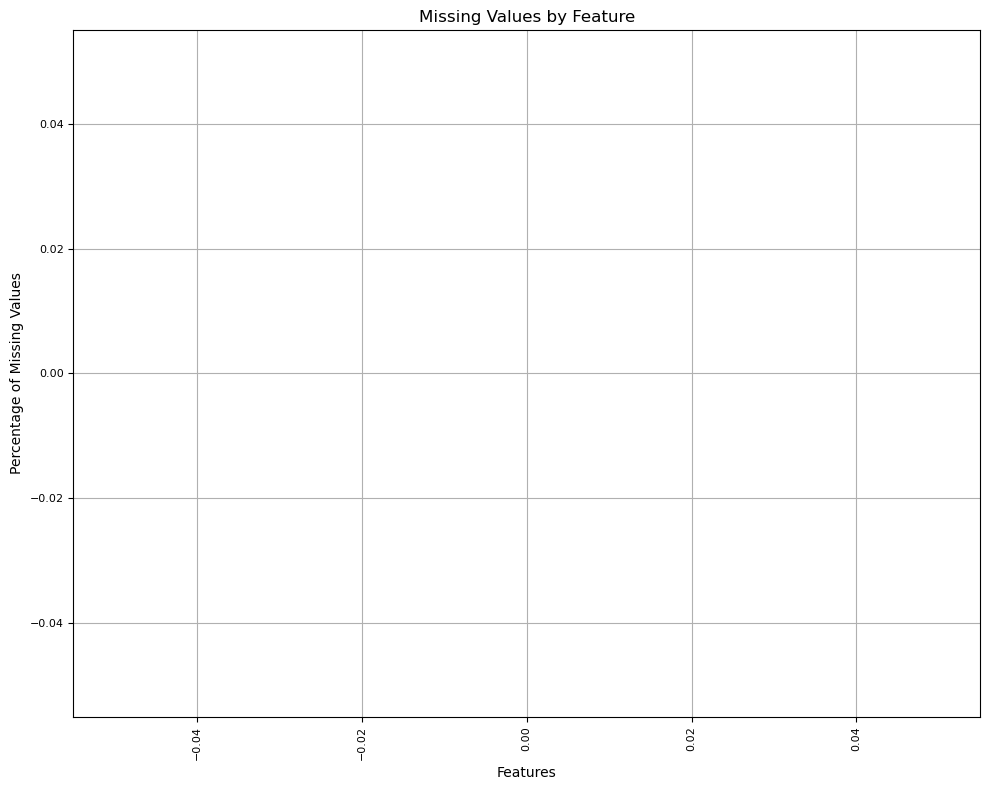

In [24]:
missing_values_table(df, plot=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34307 entries, 0 to 34306
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city                34307 non-null  object 
 1   price               34307 non-null  float64
 2   area                34307 non-null  float64
 3   kitchen_area        34307 non-null  float64
 4   total_rooms         34307 non-null  float64
 5   floor               34307 non-null  float64
 6   total_floors        34307 non-null  int64  
 7   build_date          34307 non-null  float64
 8   material_type       34307 non-null  object 
 9   remont              34307 non-null  object 
 10  total_balcony       34307 non-null  object 
 11  metro_name          34307 non-null  object 
 12  metro_dist_km       34307 non-null  float64
 13  distance_to_center  34307 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 3.7+ MB


# Visualization (graphics)

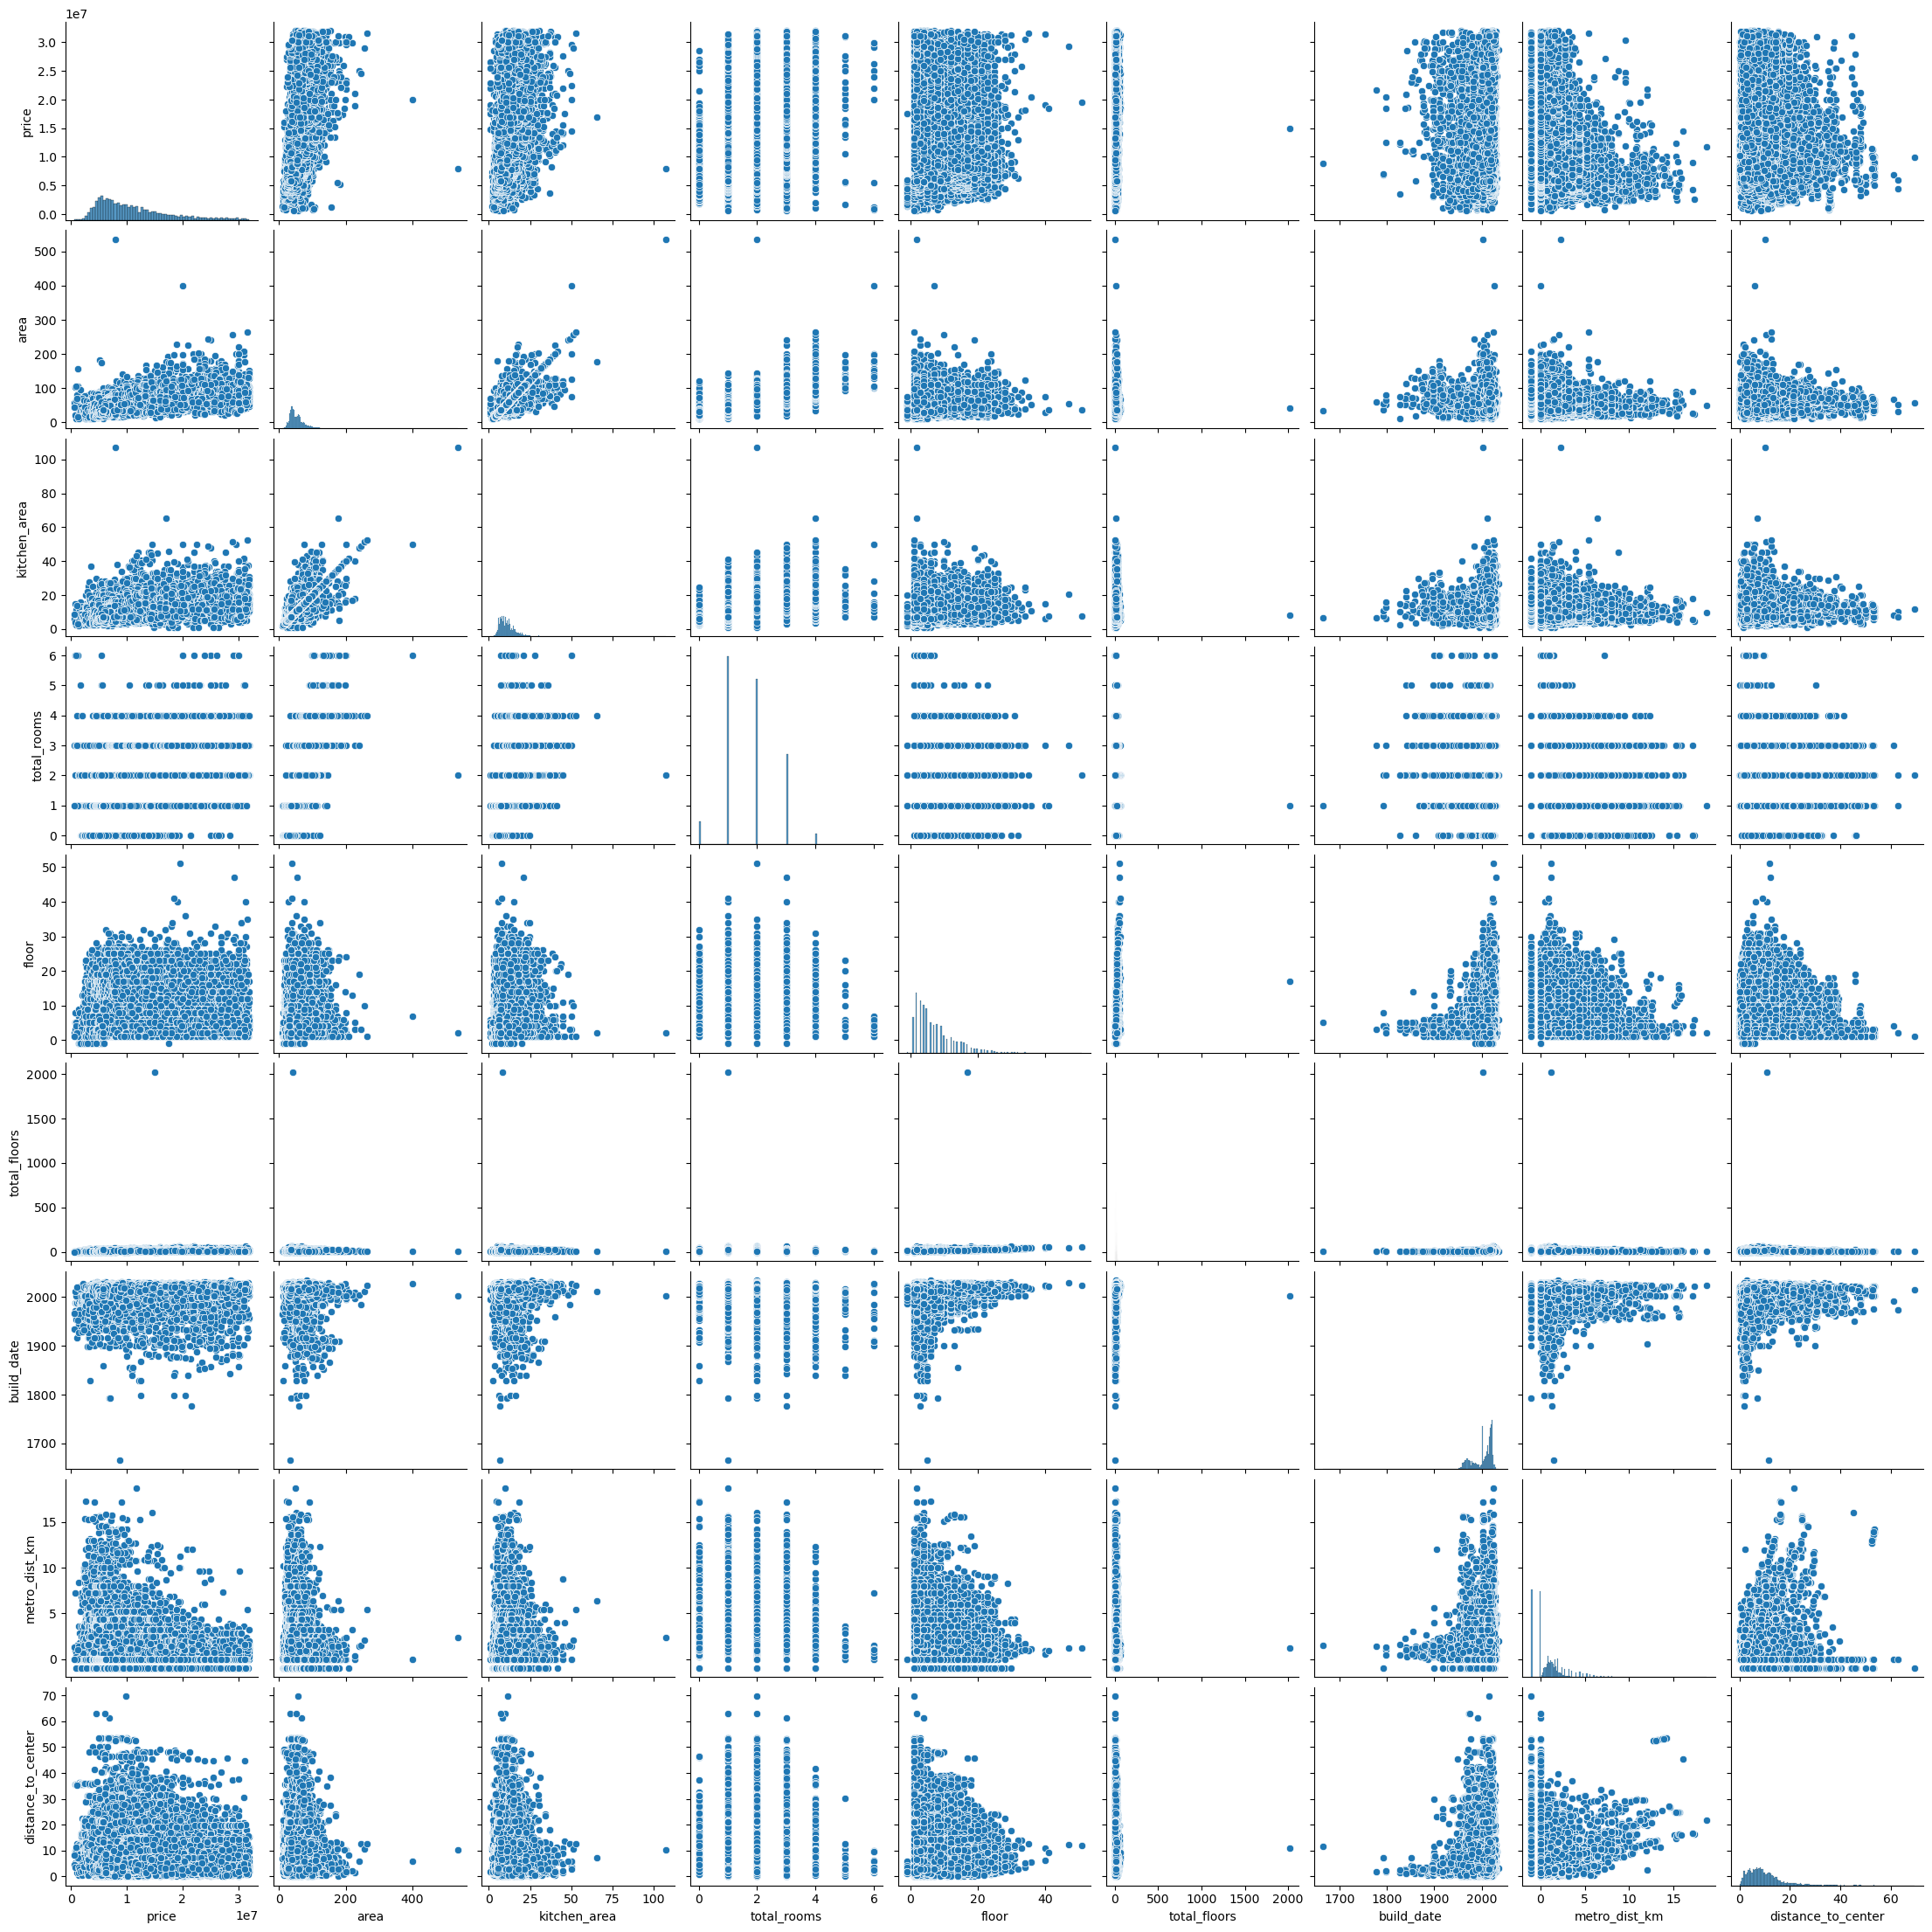

In [26]:
sns.pairplot(df)

In [27]:
count_rooms = df['total_rooms'].value_counts()
count_rooms

total_rooms
1.0    13529
2.0    11855
3.0     6460
0.0     1650
4.0      771
5.0       26
6.0       16
Name: count, dtype: int64

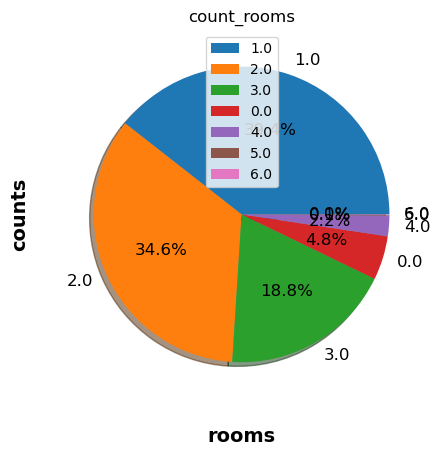

In [28]:
plt.figure()
explode = (0,0.09)
count_rooms.plot(kind = 'pie', fontsize = 12, autopct = '%.1f%%',shadow = True)
plt.title('count_rooms')
plt.xlabel('rooms', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.ylabel('counts', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.legend(labels = count_rooms.index, loc = "best")
plt.show()

In [29]:
count_city = df['city'].value_counts()
count_city

city
Санкт-Петербург    9277
Москва             7298
Новосибирск        3516
Екатеринбург       3156
Казань             2276
Геленджик          1454
Балашиха           1369
Самара             1287
Краснодар          1258
Нижний Новгород    1204
Анапа              1127
Сочи               1085
Name: count, dtype: int64

In [30]:
count_type_perec = df['material_type'].value_counts()
count_type_perec

material_type
Монолитный             11934
Панельный               8145
Кирпичный               7527
Монолитно-кирпичный     5516
Блочный                 1132
Деревянный                22
Старый фонд               22
Сталинский                 9
Name: count, dtype: int64

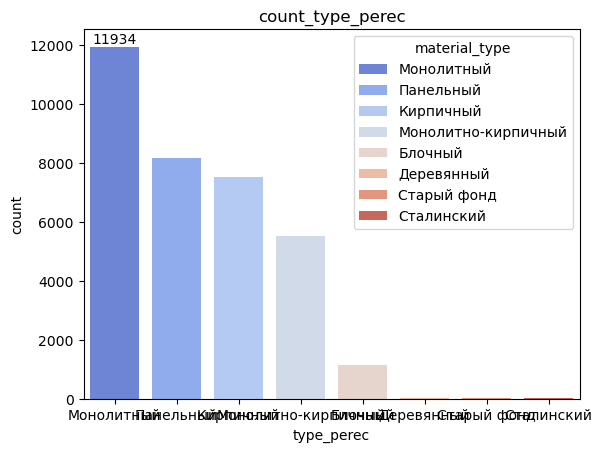

In [31]:
plt.figure()
ax = sns.barplot(x = count_type_perec.index,y = count_type_perec.values, palette='coolwarm', legend=True, hue=count_type_perec.index)
ax.bar_label(ax.containers[0], fontsize=10);
plt.title('count_type_perec')
plt.xlabel('type_perec')
plt.ylabel('count')
plt.show()

In [32]:
count_remont = df['remont'].value_counts()
count_remont

remont
empty             12274
standard           7217
well_done          6612
design             3061
without_repair     3057
without             912
fine                906
rough               232
simple               36
Name: count, dtype: int64

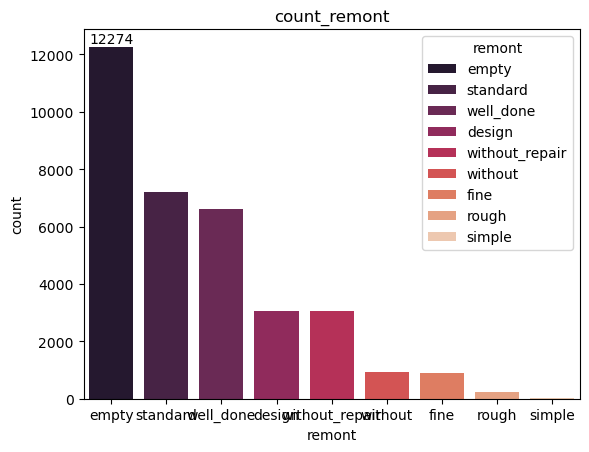

In [33]:
plt.figure()
ax = sns.barplot(x=count_remont.index,y=count_remont.values, palette='rocket', legend=True, hue=count_remont.index)
ax.bar_label(ax.containers[0], fontsize=10);
plt.title('count_remont')
plt.xlabel('remont')
plt.ylabel('count')
plt.show()

# Fix columns types :wrench:

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34307 entries, 0 to 34306
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city                34307 non-null  object 
 1   price               34307 non-null  float64
 2   area                34307 non-null  float64
 3   kitchen_area        34307 non-null  float64
 4   total_rooms         34307 non-null  float64
 5   floor               34307 non-null  float64
 6   total_floors        34307 non-null  int64  
 7   build_date          34307 non-null  float64
 8   material_type       34307 non-null  object 
 9   remont              34307 non-null  object 
 10  total_balcony       34307 non-null  object 
 11  metro_name          34307 non-null  object 
 12  metro_dist_km       34307 non-null  float64
 13  distance_to_center  34307 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 3.7+ MB


In [35]:
df.kitchen_area = df.kitchen_area.astype('float')
df.total_rooms = df.total_rooms.astype('float')
df.floor = df.floor.astype('int')
df.total_floors = df.total_floors.astype('int')
df.total_balcony = df.total_balcony.astype('float')
df.build_date = df.build_date.astype('float')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34307 entries, 0 to 34306
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city                34307 non-null  object 
 1   price               34307 non-null  float64
 2   area                34307 non-null  float64
 3   kitchen_area        34307 non-null  float64
 4   total_rooms         34307 non-null  float64
 5   floor               34307 non-null  int64  
 6   total_floors        34307 non-null  int64  
 7   build_date          34307 non-null  float64
 8   material_type       34307 non-null  object 
 9   remont              34307 non-null  object 
 10  total_balcony       34307 non-null  float64
 11  metro_name          34307 non-null  object 
 12  metro_dist_km       34307 non-null  float64
 13  distance_to_center  34307 non-null  float64
dtypes: float64(8), int64(2), object(4)
memory usage: 3.7+ MB


# :star: Features & Target :dart: 

In [37]:
x = df.drop(columns=['price'])
y = df['price']

In [38]:
y

0        10952600.0
1        16890000.0
2         9649380.0
3         8700000.0
4         2000000.0
            ...    
34302     5656320.0
34303     5721800.0
34304     5733750.0
34305     5782400.0
34306     5828800.0
Name: price, Length: 34307, dtype: float64

In [39]:
# y = y.values.reshape(-1,1)
# y

# :mag: Scaling and split :scissors:

In [40]:
# scaler_x = MinMaxScaler()
# scaler_y = MinMaxScaler()
# x = scaler_x.fit_transform(x)
# y = scaler_y.fit_transform(y)

X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.2, shuffle=True, random_state=42)
X_train, X_val, y_train, y_val=train_test_split(X_train, y_train, test_size=0.2, shuffle=True, random_state=42)
# joblib.dump(scaler_x, "../../scalers/alpha1_x.bin")
# joblib.dump(scaler_y, "../../scalers/alpha1_y.bin")

In [41]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34307 entries, 0 to 34306
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city                34307 non-null  object 
 1   area                34307 non-null  float64
 2   kitchen_area        34307 non-null  float64
 3   total_rooms         34307 non-null  float64
 4   floor               34307 non-null  int64  
 5   total_floors        34307 non-null  int64  
 6   build_date          34307 non-null  float64
 7   material_type       34307 non-null  object 
 8   remont              34307 non-null  object 
 9   total_balcony       34307 non-null  float64
 10  metro_name          34307 non-null  object 
 11  metro_dist_km       34307 non-null  float64
 12  distance_to_center  34307 non-null  float64
dtypes: float64(7), int64(2), object(4)
memory usage: 3.4+ MB


# Teach Models :books:

In [42]:
cb_learn_rate = 0.004
n_iterations = 30000
early_stop_rounds = 400

In [43]:
opt_catboost_params = {'iterations' : n_iterations,
                       'learning_rate' : cb_learn_rate,
                       'loss_function' : 'RMSE', 
                       'eval_metric' : 'RMSE',
                       'grow_policy' : 'SymmetricTree',
                       'verbose' : 500,
                       'random_seed' : 42,
                       'cat_features': [0, 7, 8, 10]}

model = CatBoostRegressor(**opt_catboost_params)
model.fit(X_train, y_train, eval_set=(X_val, y_val), 
           use_best_model=True, plot=True, 
           early_stopping_rounds=early_stop_rounds)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 6161156.0043423	test: 6282227.3134191	best: 6282227.3134191 (0)	total: 66.4ms	remaining: 33m 12s
500:	learn: 3074426.5874071	test: 3192029.2575155	best: 3192029.2575155 (500)	total: 2.58s	remaining: 2m 31s
1000:	learn: 2594096.2036600	test: 2704411.8299750	best: 2704411.8299750 (1000)	total: 5.1s	remaining: 2m 27s
1500:	learn: 2424478.8660441	test: 2532577.2084155	best: 2532577.2084155 (1500)	total: 7.78s	remaining: 2m 27s
2000:	learn: 2334849.7536525	test: 2445654.7850337	best: 2445654.7850337 (2000)	total: 10.4s	remaining: 2m 26s
2500:	learn: 2272331.7857584	test: 2385315.7740686	best: 2385315.7740686 (2500)	total: 13.1s	remaining: 2m 24s
3000:	learn: 2219902.7521112	test: 2337060.0466266	best: 2337060.0466266 (3000)	total: 15.8s	remaining: 2m 21s
3500:	learn: 2174125.8955190	test: 2297372.4010336	best: 2297372.4010336 (3500)	total: 18.4s	remaining: 2m 18s
4000:	learn: 2136781.7679846	test: 2268042.5701908	best: 2268042.5701908 (4000)	total: 21.1s	remaining: 2m 16s
4500:	le

# Test model 

In [44]:
y_pred = model.predict(X_test)
    
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
    
print("Results for CatBoost:")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared Score:", r2)
print()

Results for CatBoost:
Mean Squared Error (MSE): 4075295392985.6567
Root Mean Squared Error (RMSE): 2018736.0879980465
Mean Absolute Error (MAE): 1295898.3264737953
R-squared Score: 0.8961191243152238



# Features importances :star:

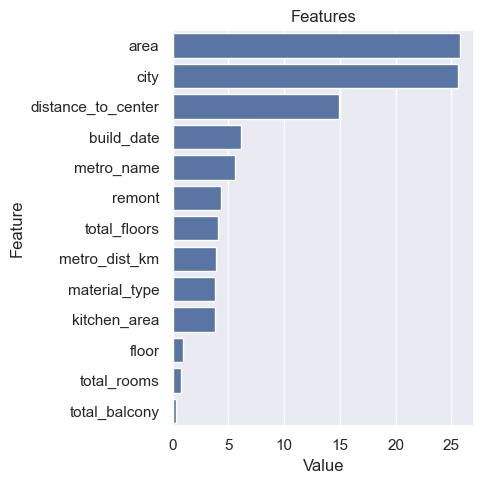

In [45]:
def plot_importance(model, features, dataframe, save=False):
    num = len(dataframe)
    feature_imp = pd.DataFrame({"Value": model.feature_importances_, "Feature": features.columns})
    plt.figure(figsize=(5, 5))
    sns.set_theme(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:40])
    plt.title("Features")
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig("../../img/importances.png")

plot_importance(model, X_train, df)

# Get model params

In [46]:
model.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'RMSE',
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1'],
 'iterations': 30000,
 'sampling_frequency': 'PerTree',
 'fold_permutation_block': 0,
 'leaf_estimation_method': 'Newton',
 'od_pval': 0,
 'random_score_type': 'NormalWithModelSizeDecrease',
 'counter_calc_method': 'SkipTest',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'ctr_leaf_count_limit': 18446744073709551615,
 'bayesian_matrix_reg': 0.10000000149011612,
 'one_hot_max_size': 2,
 'eval_fraction': 0,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'od_type': 'Iter',
 'rsm': 1,
 'boost_from_average': True,
 'max_ctr_complexity': 4,
 'model_size_reg': 0.5,
 'simple_ctr': ['Bor

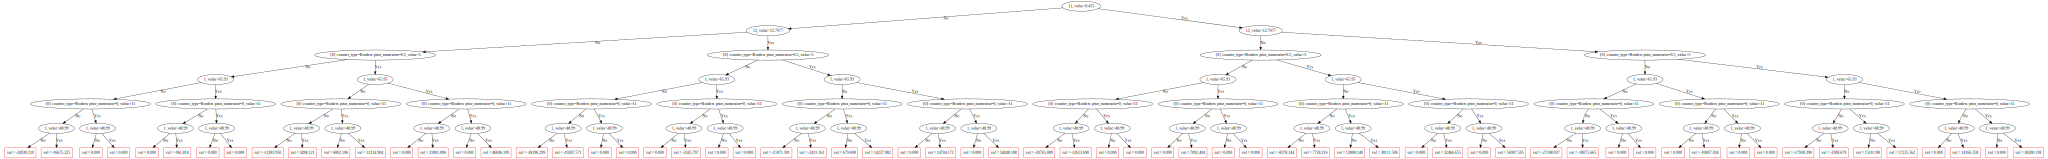

In [47]:
model.plot_tree(0)

# Save the best model :floppy_disk:

In [48]:
model_path = "../../models/kosogorova3.cbm"
model.save_model(model_path)


# Test the best model :triangular_ruler:

In [49]:
available_values = {
    'city': list(df.city.unique()),
    'material_type': list(df.material_type.unique()),
    'remont': list(df.remont.unique()),
    'metro_name': list(df.metro_name.unique())
}
with open('../../src/available_values.json', 'w') as f:
    json.dump(available_values, f)
available_values


{'city': ['Анапа',
  'Балашиха',
  'Екатеринбург',
  'Геленджик',
  'Казань',
  'Краснодар',
  'Москва',
  'Нижний Новгород',
  'Новосибирск',
  'Самара',
  'Сочи',
  'Санкт-Петербург'],
 'material_type': ['Монолитный',
  'Блочный',
  'Монолитно-кирпичный',
  'Панельный',
  'Кирпичный',
  'Деревянный',
  'Старый фонд',
  'Сталинский'],
 'remont': ['fine',
  'empty',
  'without',
  'rough',
  'standard',
  'design',
  'well_done',
  'without_repair',
  'simple'],
 'metro_name': ['',
  'Некрасовка',
  'Салтыковская',
  'Реутов',
  'Новокосино',
  'Железнодорожная',
  'Щёлковская',
  'Кучино',
  'Ольгино',
  'Никольское',
  'Новогиреево',
  'Первомайская',
  'Динамо',
  'Чкаловская',
  'Площадь 1905 года',
  'Машиностроителей',
  'Уралмаш',
  'Геологическая',
  'Ботаническая',
  'Уральская',
  'Проспект Космонавтов',
  'Аметьево',
  'Горки',
  'Суконная слобода',
  'Проспект Победы',
  'Площадь Тукая',
  'Северный Вокзал',
  'Козья слобода',
  'Авиастроительная',
  'Кремлёвская',
  'Яшьле

In [50]:
dict_param = ((df.drop(['price'], axis=1)).iloc[0]).to_dict()
dict_param

{'city': 'Анапа',
 'area': 46.0,
 'kitchen_area': 23.1,
 'total_rooms': 2.0,
 'floor': 6,
 'total_floors': 8,
 'build_date': 2022.0,
 'material_type': 'Монолитный',
 'remont': 'fine',
 'total_balcony': 1.0,
 'metro_name': '',
 'metro_dist_km': 0.0,
 'distance_to_center': 10.867409215055272}

In [51]:
model = CatBoostRegressor().load_model(model_path)


def price_predict(model, dict_param):
    df = pd.DataFrame.from_dict({'0': dict_param.values()}, columns=dict_param.keys(), orient='index')
    df = df[['city', 'area', 'kitchen_area', 'total_rooms', 'floor', 'total_floors',
       'build_date', 'material_type', 'remont', 'total_balcony', 'metro_name',
       'metro_dist_km', 'distance_to_center']]
    result = model.predict(df)
    return ceil(result)

In [52]:
price_predict(model, dict_param)

10231760